# Chapter 13 : 계층적 군집화 모델
## 1. 계층적 군집화 모델이란?
- 계층적 군집화(hierarchical clustering) : 계층적으로 포함 관계인 군집(nested cluster)을 병합(merging)하거나 분할(splitting)하는 군집화 알고리즘
- 군집 계층(clusters hierarchy) : 트리 or 덴드로그램(dendrogram) 형태로 시각화
- 트리의 루트 노드(root node)는 모든 샘플로 구성된 단일 군집이며, 루트 노드의 자식 노드로 진행할수록 점점 더 많은 군집으로 분할됨  
<br><br>
- 병합적 군집화(agglomerative clustering) : 계층적 군집화를 상향식(bottom-up) 방식으로 진행하는 방법
- 모든 샘플은 각자 자신만으로 구성된 군집 상태로 시작
- 계층이 진행될수록 가장 가까운 군집끼리 연결되어 새로운 군집을 형성하면서 군집 개수가 줄기 시작
- 모든 샘플이 하나의 군집에 포함되며 군집화를 종료
- 큰 크기의 샘플에도 적용 가능
- 제약 조건이 없다면 클수록 계산이 복잡해짐
    - 각 병합의 모든 경우의 수를 고려하기 때문

## 2. 계층적 군집화 모델 구현하기
### 계층적 군집화 모델의 이론
- 병합적 군집화 : 가까운 군집끼리 묶어 새로운 군집을 형성
- 두 점 사이의 거리 정의 후 두 점 사의의 거리를 이용하여 군집 사이의 거리를 정의
- 두 점 사이의 거리 계산값을 이용하여 군집 사이의 거리를 계산
- 군집 간 거리를 모두 계산한 후 가장 가까운 두 군집을 병합

#### 두 샘플 사이의 거리
- 두 샘플이 주어졌을 때 구 샘플 사이의 거리 메트릭(distance metric) 정의
- 유클리드 거리, L1 거리, L2 거리, 코사인 거리 등 사용

#### 군집 사이의 거리
- 연결법(linkage criteria) : 샘플 간 거리를 정의한 상태에서 두 군집 사이의 거리를 정의한 것
- 단일 연결법(single/minimum linkage) : 두 군집 간 원소끼리의 거리를 모두 비교한 후 최소 거리를 군집 간 거리로 정의 
$SingleLinkage(A, B) = min{d(a, b) : a \in A, b \in B}$  
<br><br>
- 최장 연결법(complete/maximum linkage) : 두 군집 간 원소끼리의 거리를 모두 비교한 후 최대 거리를 군집 간 거리로 정의  
$CompleteLinkage(A, B) = max{d(a, b) : a \in A, b \in B}$  
<br><br>
- 평균 연결법(average linkage) : 두 군집 간 원소끼리의 거리를 모두 비교한 후 평균 거리를 군집 간 거리로 정의  
$AverageLinkage(A, B) = \frac{1}{|A| x |B|} \sum_{a \in A, b \in B} d(a, b)$  
<br><br>
- 중심 연결법(centroid linkage) : 각 군집의 중심(centroid)을 구한 후 중심 사이의 거리를 군집의 거리로 정의  
$CentroidLinkage(A, B) = d(\mu_A, \mu_B)$
    - 각 군집의 중심 : 군집 내 원소의 무게 중심
    - 군집 A = ${(x_1, y_1), \dots, (x_{n_A}, y_{n_A})}$  
    $\mu_A = \frac{\sum_{i = 1}^{n_A} (x_i, y_i)}{|A|}$  
<br><br>
- 와드 연결법(Ward linkage) : 두 군집을 병합했을 때 군집 내 분산의 증가분을 두 군집 사이의 거리로 정의  
$WardLinkage(A, B) = \sum_{a \in A} d(a, \mu_A) + \sum_{b \in B} d(b, \mu_B) - \sum_{c \in A \cup B} d(c, \mu_{A \cup B})$
    - 군집 내 분산 : 각 군집을 군집의 중심으로만 근사했을 때 발생하는 정보의 손실
    - 세부적으로 다양한 변형 정의가 있음
    - $\mu_A, \mu_B, \mu_{A \cup B}$ = A 집합, B 집합, A와 B 합집합의 무게 중심

#### 연결법 선택
- 데이터 형태나 분석 목적에 따라 적합한 연결법은 다를 수 있음
- 비슷한 크기의 여러 군집을 형성하고 싶은 상황이라면 단일 연결법은 좋지 않은 선택지임
- 와드 연결법이 가장 좋은 전략이 될 수 있음
- 단일 연결법
    - 데이터의 노이즈에 강진(robust)하지는 못함
    - 매우 빠르게 계산 가능
    - 큰 데이터셋에서 계층적 군집화를 수행할 때 유용
    - 컨벡스 집합(convex set)이 아니라면 상대적으로 성능이 우수
    
#### 시간 복잡도
- 병합적 군집화 알고리즘의 시간 복잡도
    - 단일 연결법 : $O(n^2)$ (가장 우수)
    - 나머지 연결법 : $O(n^2logn)$ 이상 (단일 연결법보다는 더 많은 시간이 걸림)
- K-평균 군집화 모델에 비해 높은 시간 복잡도를 가짐

### 계층적 군집화 모델 구현하기
- 유클리드 거리 메트릭과 단일 연결법을 이용하여 병합적 군집화 기법을 구현

In [1]:
import numpy as np

X = np.array([[0, 1], [1, 3], [0, 1], [4, 9], [3, -2], [-1, 1]])

- 모든 샘플이 각자 클러스터를 이루도록 구성

In [2]:
clusters = [[X[i]] for i in range(len(X))]

print(f'초기 군집 : {clusters}')

초기 군집 : [[array([0, 1])], [array([1, 3])], [array([0, 1])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1])]]


- 유클리드 거리와 단일 연결법을 이용한 군집 간 거리 함수를 정의
- 군집 A와 B가 입력값으로 주어졌을 때 각 군집의 원소 쌍을 뽑아 거리를 계산한 후 최솟값을 반환

In [3]:
def dist(A, B):
    val = np.inf
    for a in A:
        for b in B:
            tmp = np.linalg.norm(a - b)
            if (tmp < val):
                val = tmp
    
    return val

- 군집 개수가 1개가 될 때까지 군집 개수를 하나씩 줄이며 병합을 수행

In [4]:
while (len(clusters) > 1):
    val = np.inf
    ind1 = -1
    ind2 = -1
    
    for a in range(len(clusters)):
        for b in range(a):
            tmp = dist(clusters[a], clusters[b])
            if (tmp < val):
                val = tmp
                ind1 = a
                ind2 = b
                
    c1 = clusters.pop(ind1)
    c2 = clusters.pop(ind2)
    
    clusters.append(c1 + c2)
    
    print(f'단계 {6 - len(clusters)} : {clusters}')

단계 1 : [[array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1])], [array([0, 1]), array([0, 1])]]
단계 2 : [[array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([0, 1]), array([0, 1]), array([-1,  1])]]
단계 3 : [[array([4, 9])], [array([ 3, -2])], [array([0, 1]), array([0, 1]), array([-1,  1]), array([1, 3])]]
단계 4 : [[array([4, 9])], [array([0, 1]), array([0, 1]), array([-1,  1]), array([1, 3]), array([ 3, -2])]]
단계 5 : [[array([0, 1]), array([0, 1]), array([-1,  1]), array([1, 3]), array([ 3, -2]), array([4, 9])]]


## 3. 패키지로 표현하기
- sklearn.cluster.AgglomerativeClustering 클래스 : 병합적 군집화 기법을 구현
- n_clusters
    - 주요값 : int > 0, None
    - 기본값 ; 2
    - 의미 : 생성할 군집 수
- affinity
    - 주요값 : 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed'
    - 기본값 : 'euclidean'
    - 의미 : 연결에 사용할 메트릭
        - 'precomputed' : 사용자 지정 거리 행렬 사용
            - 이때 fit() 메서드가 유사도 행렬 대신 거리 행렬을 인자로 받게 됨
- linkage
    - 주요값 : 'ward', 'complete', 'average', 'single'
    - 기본값 : 'ward'
    - 의미 : 연결법 선택
        - 'ward' : 와드 연결법
            - affinity = 'euclidean'로 설정해야 함
        - 'complete' ; 완전 연결법
        - 'average' : 평균 연결법
        - 'single' : 단일 연결법
- distance_threshold
    - 주요값 : None, float > 0
    - 기본값 : None
    - 의미 : 군집화 기준 거리 설정
        - 군집의 범위를 제어하는 값
        - None : 모든 거리에 대해 군집화를 수행하여 데이터 전체가 1개의 군집으로 병합될 때까지 계층 구조를 형성함
        - float : 거리가 이 값 이상인 군집은 병합하지 않음
            - n_clusters가 None이어야 동작함

**실제 사용 시 활용 팁**
- 피처 스케일링을 선행해야 함
- 군집 개수를 먼저 결정하지 않고 계층의 형태를 보고 사후에 군집 개수를 결정할 수 있음(장점)
    - 덴드로그램을 그려 계층을 시각화한 후 군집 개수를 결정할 수 있음
- n_clusters에 적절한 값을 설정하는 경우, n_clusters를 None으로 하고 distance_threshold를 설정하여 그 거리 내에서 군집화를 하는 경우 등 2가지로 나눌 수 있음

### Agglomerative Clustering 클래스 사용하기
- AgglomerativeClustering 클래스를 사용해 여러 가지 방식으로 병합적 군집 분석을 수행하고 결과를 비교
- 거리 메트릭은 유클리드 거리를, 연결법은 최장 연결법을 사용

In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

- 가장 간단한 사용법 : n_clusters를 원하는 값으로 설정하는 것

In [6]:
clustering1 = AgglomerativeClustering(n_clusters = 2, linkage = 'complete').fit(X)

print(f'군집의 수를 설정한 모델링 결과 : {clustering1.labels_}')

군집의 수를 설정한 모델링 결과 : [0 0 1 0 0 1]


- 계층적 군집화는 각 계층에서 거리가 가까운 순끼리 묶으면서 군집을 하나씩 줄이다가 군집이 1개가 되면 끝냄
- n_clusters = 2 : 과정 중 군집 개수가 2인 단면을 나타냄
- n_clusters의 값과 distance_threshold의 값은 적당한 대응 관계가 있음
    - n_clusters를 지정하는 대신 distance_threshold를 지정해 그 거리를 기준으로 군집화를 끝내는 방법으로 문제에 접근할 수도 있음

In [7]:
clustering2 = AgglomerativeClustering(n_clusters = None,
                                      linkage = 'complete',
                                      distance_threshold = 2.5).fit(X)

print(f'군집화 기준 거리를 설정한 모델링 결과 : {clustering2.labels_}')

군집화 기준 거리를 설정한 모델링 결과 : [2 2 3 0 0 1]


- 4개의 군집이 생성된 것을 확인할 수 있음
- 계층적 군집화는 군집화 과정에서의 랜덤성이 없고 n_clusters와 distance_threshold는 군집을 묶는 방법을 설정하는 하이퍼파라미터가 아니라 계층의 단면 위치만을 나타냄  
$\rightarrow$ distance_threshold를 지정하지 않고 n_clusters를 4로 지정해도 같은 군집화 결과를 얻을 수 있음

In [8]:
clustering3 = AgglomerativeClustering(n_clusters = 4, linkage = 'complete').fit(X)

print(f'군집의 수를 4로 설정한 모델링 결과 : {clustering3.labels_}')

군집의 수를 4로 설정한 모델링 결과 : [2 2 3 0 0 1]


## 4. 계층적 군집화 모델 보충 수업
### 덴드로그램으로 군집 계층 시각화하기
- 계층적 군집화가 유용한 이유 : 덴드로그램으로 군집 계층(clusters hierarchy)을 시각화하여 군집별 묶음을 직관적으로 이해할 수 있다는 것
- 데이터셋이 커질수록 유용성이 줄기도 함

### 덴드로그램으로 계층적 군집화 결과 시각화하기
- AgglomerativeClustering 클래스를 이용해 병합적 군집 분석을 수행하고 scipy.dendrogram() 함수로 결과를 덴드로그램으로 나타냄
- 붓꽃 데이터셋 사용
- 피처의 군집화가 목표이므로 y는 정의하지 않음

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data

- 병합적 군집화 모델을 생성하고 모델을 학습
- 생성할 때 distance_threshold를 0으로 설정하여 전체 계층 구조를 계산해야 함

In [11]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model = model.fit(X)

- 학습한 모델로 linkage_matrix를 계산

In [13]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)

for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if (child_idx < n_samples):
            current_count += 1     # leaf node
        else:
            current_count += counts[child_idx - n_samples]
            
    counts[i] = current_count
    
linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

- linkage_matrix를 이용하여 덴드로그램을 그림
- 샘플이 150개인 덴드로그램을 그리면 형태가 매우 복잡하여 관찰과 해석이 어려울 수 있음
    - dendrogram() 함수는 truncate_mode = 'level', p = 3로 설정
    - 덴드로그램을 위에서부터 3개 계층까지만 표현하도록 하는 인수
- 계층이 3개 이하이고 마지막 계층에 한 개의 샘플만 있다면 해당 샘플의 인덱스(index)를 x축에 표시
- 계층이 3개를 초과하고 마지막 계층에 여러 샘플이 있다면 괄호와 함께 해당 계층 이후의 전체 샘플 수를 x축에 표시
- 군집화 결과를 간단하게 표현할 수 있어 상대적으로 결과를 쉽게 해석할 수 있음

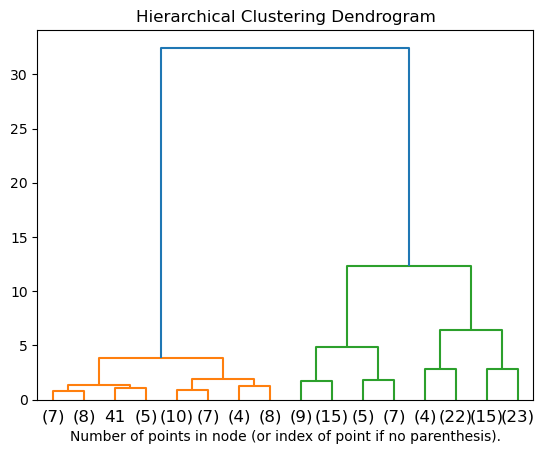

In [14]:
dendrogram(linkage_matrix, truncate_mode = 'level', p = 3)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Number of points in node (or index of point if no parenthesis).')
plt.show()

### 되새김 문제
#### 1. AgglomerativeClustering 클래스 적용하기
- AgglomerativeClustering 클래스로 병합적 군집화 모델을 학습하고 결과를 평가

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X, _ = load_diabetes(return_X_y = True, as_frame = True)

- 군집 개수에 따른 군집화 결과의 실루엣 계수를 계산한 후 이를 근거로 최적의 군집 계수를 계산
- 해당 개수의 군집으로 데이터를 분할하여 군집별 bmi값을 비교
1. 군집 개수를 5에서 11까지 변화하며 AgglomerativeClustering 클래스 객체를 학습하고 실루엣 계수를 계산한 후 이를 기반으로 최적의 군집 수를 계산하라.
    - 이때 샘플 간 거리 메트릭은 유클리드 거리를 사용하고, 군집 간 연결법은 와드 연결법을 사용한다.
2. 1단계에서 얻은 군집 개수로 AgglomerativeClustering 클래스 객체를 학습하라.
    - 이때 하이퍼파라미터는 1단계와 같게 유지한다.
3. 군집별 bmi 변수의 평균을 계산하고 그중 최댓값을 구한다.

In [17]:
for n_cluster in range(5, 12):
    cluster_labels = AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)
    
    print(n_cluster, ":", silhouette_score(X, cluster_labels))

5 : 0.10103318852875223
6 : 0.105040304263116
7 : 0.10959850255254193
8 : 0.10588224751966079
9 : 0.1061350114934274
10 : 0.10998075776769138
11 : 0.10553043308856352


- 실루엣 계수가 최댓값인 7개의 군집화 모델을 사용

In [18]:
X['label'] = AgglomerativeClustering(n_clusters = 7).fit_predict(X)

X.groupby(by = 'label').mean()['bmi'].sort_values(ascending = False)

label
5    0.029383
1    0.028349
2    0.013293
0    0.011963
3   -0.019886
6   -0.037463
4   -0.050944
Name: bmi, dtype: float64

- 정답 : 0.029383